# Part 1: Time Series Data Summarization

In [1]:
from scipy.fftpack import dct, idct
import numpy as np
import matplotlib.pyplot as plt

## Time Series Compression and Reconstruction

In [2]:
# size in byte: 128/64/32 (32/16/8 values)
def compress_to_size(x, size):
    size = int(size/4)
    com_x = dct(x, n = size, norm = 'ortho')
    return com_x
# size from 128/64/32 bytes to 1024 bytes
def decompress1024(x, size):
    rec_x = idct(x, n = 256, norm = 'ortho')
    return rec_x

### Interface to facilitate euclidean distance calculation

In [3]:
# An interface to calculate euclidean distance between 2 signals
def euc_dist(x,y):
    return float(np.linalg.norm(x - y))

# Test of Part 1: Compression and Reconstruction with given 50k time_series

## Load 50k time_series (synthetic and synthetic)

In [4]:
import struct
filename_synthetic = 'synthetic_size50k_len256_znorm.bin'
with open(filename_synthetic, 'rb') as in_file:
    time_series_synthetic = np.array(struct.unpack('f' * 50000 * 256, in_file.read())).reshape(-1,256)

filename_seismic = 'seismic_size50k_len256_znorm.bin'
with open(filename_seismic, 'rb') as in_file:
    time_series_seismic = np.array(struct.unpack('f' * 50000 * 256, in_file.read())).reshape(-1,256)

## Data compression and reconstruction for 50k seismic time_series

In [5]:
# Following code is to compress and reconstruct seismic data
# every time serie will be compressed from 256 to 128/64/32
# then the compressed data will be "enlarged" from 128/64/32 to 256

# Initialize variables to record reconstruction error for 50k time_series
errorList_128_seismic = []
errorList_64_seismic = []
errorList_32_seismic = []

data_size = 50000
for i in range(data_size):
    x = time_series_seismic[i,] # x contains 256 float numbers
    
    # 1024 -> 128 -> 1024
    resized_128 = compress_to_size(x, 128)
    reconstructed_128 = decompress1024(resized_128, 128)
    errorList_128_seismic.append(euc_dist(x, reconstructed_128))
    
    # 1024 -> 64 -> 1024
    resized_64 = compress_to_size(x, 64)
    reconstructed_64 = decompress1024(resized_64, 64)
    errorList_64_seismic.append(euc_dist(x, reconstructed_64))
    
    # 1024 -> 32 -> 1024
    resized_32 = compress_to_size(x, 32)
    reconstructed_32 = decompress1024(resized_32, 62)
    errorList_32_seismic.append(euc_dist(x, reconstructed_32))

## Data compression and reconstruction for 50k synthetic time_series

In [6]:
# Following code is to compress and reconstruct synthetic data
# every time serie will be compressed from 256 to 128/64/32
# then the compressed data will be "enlarged" from 128/64/32 to 256

# Initialize variables to record reconstruction error for 50k time_series
errorList_128_synthetic = []
errorList_64_synthetic = []
errorList_32_synthetic = []

data_size = 50000
for i in range(data_size):
    x = time_series_synthetic[i,] # x contains 256 float numbers
    
    # 1024 -> 128 -> 1024
    resized_128 = compress_to_size(x, 128)
    reconstructed_128 = decompress1024(resized_128, 128)
    errorList_128_synthetic.append(euc_dist(x, reconstructed_128))
    
    # 1024 -> 64 ->1024
    resized_64 = compress_to_size(x, 64)
    reconstructed_64 = decompress1024(resized_64, 64)
    errorList_64_synthetic.append(euc_dist(x, reconstructed_64))
    
    # 1024 -> 32 -> 1024
    resized_32 = compress_to_size(x, 32)
    reconstructed_32 = decompress1024(resized_32, 32)
    errorList_32_synthetic.append(euc_dist(x, reconstructed_32))

# Evaluate reconstruction error

In [7]:
def summarize_data(x):
    print("Average:", np.mean(x), " Mean:", np.median(x), " Max:", np.max(x), " Min:", np.min(x), "\n")

### 50k seismic

In [8]:
# Reconstruction error for 50k seismic time_series
print("Reconstruction Error of 50k seismic time series: 128 -> 1024")
summarize_data(errorList_128_seismic)
print("Reconstruction Error of 50k seismic time series: 64 -> 1024")
summarize_data(errorList_64_seismic)
print("Reconstruction Error of 50k seismic time series: 32 -> 1024")
summarize_data(errorList_32_seismic)

Reconstruction Error of 50k seismic time series: 128 -> 1024
Average: 16.96231257887925  Mean: 16.92843676536001  Max: 23.957839506815507  Min: 15.133780012240194 

Reconstruction Error of 50k seismic time series: 64 -> 1024
Average: 16.486599759632153  Mean: 16.448064815131623  Max: 23.760635791511664  Min: 15.960512178893351 

Reconstruction Error of 50k seismic time series: 32 -> 1024
Average: 16.24542467404901  Mean: 16.20807052457282  Max: 23.49631872658736  Min: 15.829534543610958 



### 50k synthetic

In [9]:
# Reconstruction error for 50k synthetic time_series
print("Reconstruction Error of 50k synthetic time series: 128 -> 1024")
summarize_data(errorList_128_synthetic)
print("Reconstruction Error of 50k synthetic time series: 64 -> 1024")
summarize_data(errorList_64_synthetic)
print("Reconstruction Error of 50k synthetic time series: 32 -> 1024")
summarize_data(errorList_32_synthetic)

Reconstruction Error of 50k synthetic time series: 128 -> 1024
Average: 17.336295073792904  Mean: 17.300945652538523  Max: 23.494936389187675  Min: 12.647032061485142 

Reconstruction Error of 50k synthetic time series: 64 -> 1024
Average: 16.798837726566667  Mean: 16.731230978755903  Max: 20.907202330811568  Min: 13.894454947580904 

Reconstruction Error of 50k synthetic time series: 32 -> 1024
Average: 16.438880624593477  Mean: 16.379613072055726  Max: 19.469692154070238  Min: 14.65843423708335 



## Visualize reconstruction errors of 50k time series with Boxplot

In [10]:
plt.rcParams['figure.figsize'] = [12, 6]

<function matplotlib.pyplot.show(*args, **kw)>

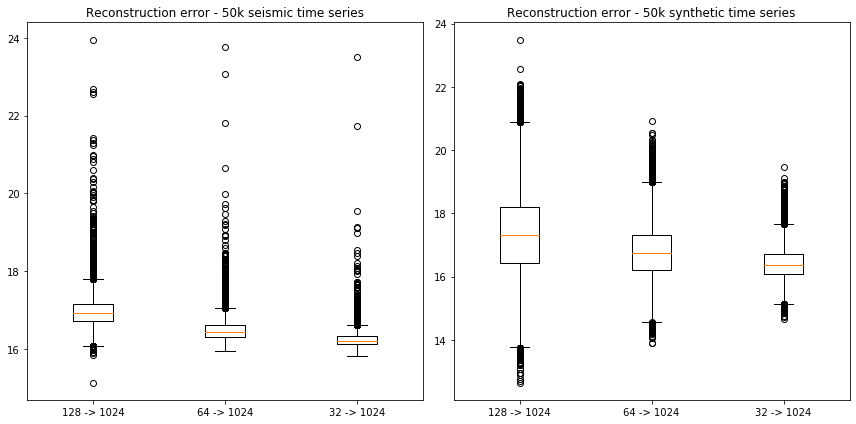

In [11]:
plt.subplot(1,2,1)
plt.boxplot([errorList_128_seismic, errorList_64_seismic, errorList_32_seismic])
plt.title('Reconstruction error - 50k seismic time series')
plt.xticks([1, 2, 3], ['128 -> 1024', '64 -> 1024', '32 -> 1024'])

plt.subplot(1,2,2)
plt.boxplot([errorList_128_synthetic, errorList_64_synthetic, errorList_32_synthetic])
plt.title('Reconstruction error - 50k synthetic time series')
plt.xticks([1, 2, 3], ['128 -> 1024', '64 -> 1024', '32 -> 1024'])

plt.tight_layout()
plt.show

# Example: Visualization of Data Compression and Reconstruction

In [12]:
plt.rcParams['figure.figsize'] = [15, 7.5]

<function matplotlib.pyplot.show(*args, **kw)>

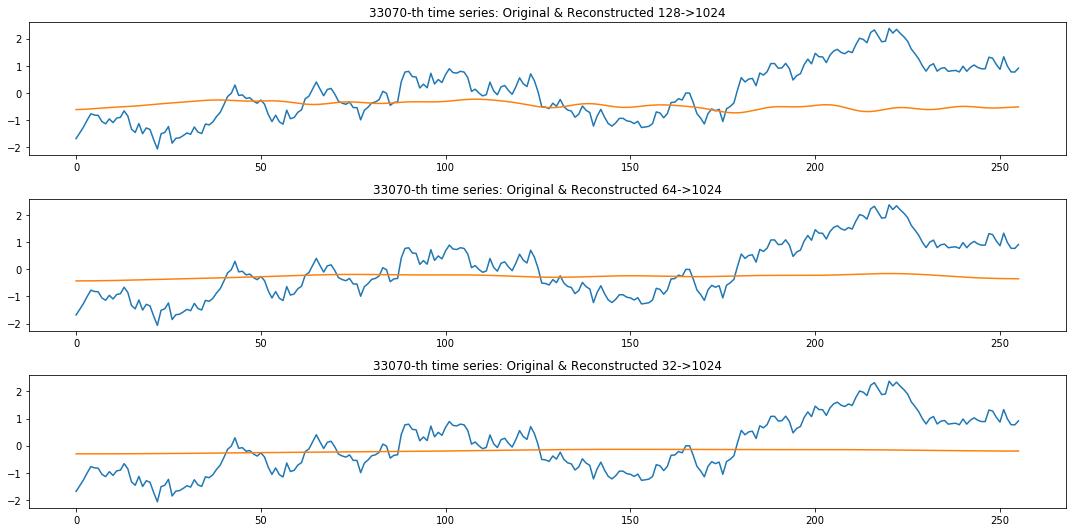

In [13]:
import random
i = random.randrange(0,49999)
t = range(256)
x = time_series_synthetic[i,]
rec_128 = decompress1024(compress_to_size(x, 128), 128)
rec_64 = decompress1024(compress_to_size(x, 64), 64)
rec_32 = decompress1024(compress_to_size(x, 32), 32)

plt.subplot(3,1,1)
plt.plot(t, x, t, rec_128)
plt.title(str(i)+'-th time series: Original & Reconstructed 128->1024')

plt.subplot(3,1,2)
plt.plot(t, x, t, rec_64)
plt.title(str(i)+'-th time series: Original & Reconstructed 64->1024')

plt.subplot(3,1,3)
plt.plot(t, x, t, rec_32)
plt.title(str(i)+'-th time series: Original & Reconstructed 32->1024')

plt.tight_layout()
plt.show

# Part 2: Similarity Search by using Euclidean Distance (with Data Summarization)

## Function: Similarity Search WITH Data Summarization

In [14]:
def similarity_euclidean_compression(q, time_series, compress_size):
    
    # Compress the query signal to a smaller time series which contains "compress_size" float numbers
    q_com = compress_to_size(q, compress_size)

    D_closest_com = 10000.0  # Initialize closest distance for compressed time series as infinitiy
    D_closest_1024 = 10000.0  # Initialize closest distance for original time series as infinitiy
    index_closest = 0        # Initialize closest time series' index as 0
    pruning_count = 0        # Initialize pruning count as 0
    
    for i in range(time_series.shape[0]): # Loop for all time_series
        x = time_series[i, ]
        x_com = compress_to_size(x, compress_size)
        
        dist_com = euc_dist(q_com, x_com) # Calculate euclidean distance between compressed time series
        if D_closest_com > dist_com:
            
            dist_1024 = euc_dist(q, x) # Calculate the euclidean distance between original time series
            if D_closest_1024 > dist_1024:
                
                # Memorization
                D_closest_com = dist_com
                D_closest_1024 = dist_1024
                index_closest = i
        
        # When euclidean distance between compressed time series is bigger
        else:
            # The time series is pruned, we count all pruned times
            pruning_count += 1
            
    # Return index, distance and pruning times for this similarity search
    return index_closest, D_closest_1024, pruning_count

## Function: Similarity Search WITHOUT Data Summarization

In [15]:
def similarity_euclidean_no_compression(q, time_series):

    D_closest_1024 = 10000.0  # Initialize original minimum distance as infinitiy
    index_closest = 0        # Initialize closest time series' index as 0
    
    for i in range(time_series.shape[0]): # Loop for all time_series
        x = time_series[i, ]
        dist_1024 = euc_dist(q, x) # Calculate the euclidean distance between original time series
        
        if D_closest_1024 > dist_1024:
            D_closest_1024 = dist_1024
            index_closest = i
            
    # Return index, distance for this similarity search
    return index_closest, D_closest_1024

# Test 2: Similarity Search WITH and WITHOUT Data Summarization

## Load 100 query time_series and 50k time_series (synthetic and synthetic)

In [16]:
import struct
filename_seismic_query = 'seismic-query_size100_len256_znorm.bin'
with open(filename_seismic_query, 'rb') as in_file:
    time_series_seismic_query = np.array(struct.unpack('f' * 100 * 256, in_file.read())).reshape(-1,256)

filename_synthetic_query = 'synthetic-query_size100_len256_znorm.bin'
with open(filename_synthetic_query, 'rb') as in_file:
    time_series_synthetic_query = np.array(struct.unpack('f' * 100 * 256, in_file.read())).reshape(-1,256)

filename_seismic = 'seismic_size50k_len256_znorm.bin'
with open(filename_synthetic, 'rb') as in_file:
    time_series_seismic = np.array(struct.unpack('f' * 50000 * 256, in_file.read())).reshape(-1,256)

filename_synthetic = 'synthetic_size50k_len256_znorm.bin'
with open(filename_synthetic, 'rb') as in_file:
    time_series_synthetic = np.array(struct.unpack('f' * 50000 * 256, in_file.read())).reshape(-1,256)

## For every query time series, find a closest time series from 50k

### Initialize memorization variables

In [17]:
distSimilarity_128_seismic = []
distSimilarity_64_seismic = []
distSimilarity_32_seismic = []
distSimilarity_seismic = []

indexSimilarity_128_seismic = []
indexSimilarity_64_seismic = []
indexSimilarity_32_seismic = []
indexSimilarity_seismic = []

pruning_count_128_seismic = 0
pruning_count_64_seismic = 0
pruning_count_32_seismic = 0

distSimilarity_128_synthetic = []
distSimilarity_64_synthetic = []
distSimilarity_32_synthetic = []
distSimilarity_synthetic = []

indexSimilarity_128_synthetic = []
indexSimilarity_64_synthetic = []
indexSimilarity_32_synthetic = []
indexSimilarity_synthetic = []

pruning_count_128_synthetic = 0
pruning_count_64_synthetic = 0
pruning_count_32_synthetic = 0

## Similarity search WITH data summarization(128/64/32) and WITHOUT data summarization

### 100 seismic queries

In [18]:
query_size = 100
for i in range(query_size):
    
    # Seismic
    q = time_series_seismic_query[i,]
    # 128
    idx, dist, pruning_count = similarity_euclidean_compression(q, time_series_seismic, 128)
    distSimilarity_128_seismic.append(dist)
    indexSimilarity_128_seismic.append(idx)
    pruning_count_128_seismic += pruning_count
    # 64
    idx, dist, pruning_count = similarity_euclidean_compression(q, time_series_seismic, 64)
    distSimilarity_64_seismic.append(dist)
    indexSimilarity_64_seismic.append(idx)
    pruning_count_64_seismic += pruning_count
    # 32
    idx, dist, pruning_count = similarity_euclidean_compression(q, time_series_seismic, 32)
    distSimilarity_32_seismic.append(dist)
    indexSimilarity_32_seismic.append(idx)
    pruning_count_32_seismic += pruning_count
    # without data summarization
    idx_no_com, dist_no_com = similarity_euclidean_no_compression(q, time_series_seismic)
    distSimilarity_seismic.append(dist_no_com)
    indexSimilarity_seismic.append(idx_no_com)

### 100 synthetic queries

In [19]:
query_size = 100
for i in range(query_size):
    
    # Synthetic
    q = time_series_synthetic_query[i,]
    # 128
    idx, dist, pruning_count = similarity_euclidean_compression(q, time_series_synthetic, 128)
    distSimilarity_128_synthetic.append(dist)
    indexSimilarity_128_synthetic.append(idx)
    pruning_count_128_synthetic += pruning_count
    # 64
    idx, dist, pruning_count = similarity_euclidean_compression(q, time_series_synthetic, 64)
    distSimilarity_64_synthetic.append(dist)
    indexSimilarity_64_synthetic.append(idx)
    pruning_count_64_synthetic += pruning_count
    # 32
    idx, dist, pruning_count = similarity_euclidean_compression(q, time_series_synthetic, 32)
    distSimilarity_32_synthetic.append(dist)
    indexSimilarity_32_synthetic.append(idx)
    pruning_count_32_synthetic += pruning_count
    # without data summarization
    idx_no_com, dist_no_com = similarity_euclidean_no_compression(q, time_series_synthetic)
    distSimilarity_synthetic.append(dist_no_com)
    indexSimilarity_synthetic.append(idx_no_com)

## Pruning ratio

In [20]:
size = 100
print("Similarity search for seismic time series:")
print("Average pruning ratio 128/64/32: ", pruning_count_128_seismic/size/50000, pruning_count_64_seismic/size/50000, pruning_count_32_seismic/size/50000)

print("Similarity search for synthetic time series:")
print("Average pruning ratio 128/64/32: ", pruning_count_128_synthetic/size/50000, pruning_count_64_synthetic/size/50000, pruning_count_32_synthetic/size/50000)

Similarity search for seismic time series:
Average pruning ratio 128/64/32:  0.9842328 0.9812960000000001 0.9908772
Similarity search for synthetic time series:
Average pruning ratio 128/64/32:  0.9768924000000001 0.9815367999999999 0.9807342


# Comparison of similarity search error: with data summarization (128/64/32) and without data summarization

In [21]:
print("Seismic time series: ")
print("---------------------")
print("Similarity search error - with data summarization (128)")
summarize_data(distSimilarity_128_seismic)
print("Similarity search error - with data summarization (64)")
summarize_data(distSimilarity_64_seismic)
print("Similarity search error - with data summarization (32)")
summarize_data(distSimilarity_32_seismic)
print("Similarity search error - without data summarization")
summarize_data(distSimilarity_seismic)

Seismic time series: 
---------------------
Similarity search error - with data summarization (128)
Average: 22.092461044568537  Mean: 22.08475908112178  Max: 22.276066944341444  Min: 21.81805420871964 

Similarity search error - with data summarization (64)
Average: 22.06634238498968  Mean: 22.063466111881567  Max: 22.3497546899965  Min: 21.644857901390523 

Similarity search error - with data summarization (32)
Average: 22.0685792826487  Mean: 22.064495171468607  Max: 22.476683439016025  Min: 21.717189036502003 

Similarity search error - without data summarization
Average: 21.784462755940172  Mean: 21.79641961257886  Max: 21.98575356715846  Min: 21.42455570887258 



In [22]:
print("Synthetic time series: ")
print("---------------------")
print("Similarity search error - with data summarization (128)")
summarize_data(distSimilarity_128_synthetic)
print("Similarity search error - with data summarization (64)")
summarize_data(distSimilarity_64_synthetic)
print("Similarity search error - with data summarization (32)")
summarize_data(distSimilarity_32_synthetic)
print("Similarity search error - without data summarization")
summarize_data(distSimilarity_synthetic)

Synthetic time series: 
---------------------
Similarity search error - with data summarization (128)
Average: 21.883394289191177  Mean: 21.92885554558254  Max: 22.546022680050353  Min: 21.05501757132239 

Similarity search error - with data summarization (64)
Average: 21.870868844492605  Mean: 21.914374745750003  Max: 22.593829050537607  Min: 21.085604719849226 

Similarity search error - with data summarization (32)
Average: 21.883689300236547  Mean: 21.89043951347584  Max: 22.763790384170747  Min: 21.085604719849226 

Similarity search error - without data summarization
Average: 21.550549634946957  Mean: 21.591055321631426  Max: 22.375358757892045  Min: 20.78892850203825 



In [23]:
plt.rcParams['figure.figsize'] = [12, 6]

<function matplotlib.pyplot.show(*args, **kw)>

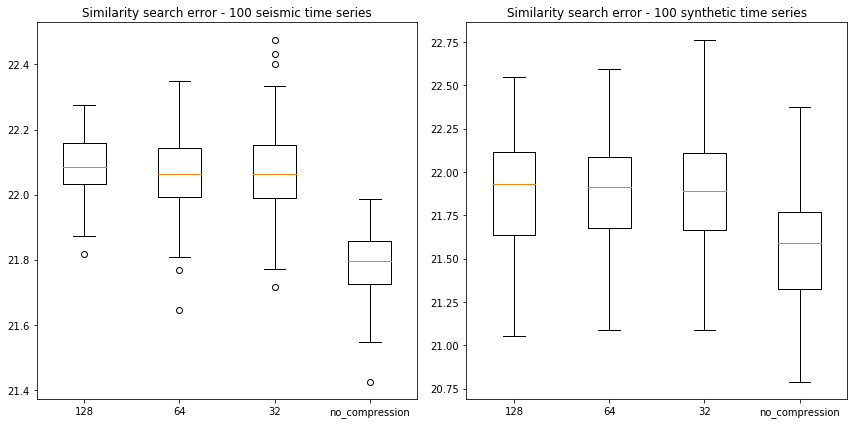

In [24]:
plt.subplot(1,2,1)
plt.boxplot([distSimilarity_128_seismic, distSimilarity_64_seismic, distSimilarity_32_seismic, distSimilarity_seismic])
plt.title('Similarity search error - 100 seismic time series')
plt.xticks([1, 2, 3, 4], ['128', '64', '32', 'no_compression'])

plt.subplot(1,2,2)
plt.boxplot([distSimilarity_128_synthetic, distSimilarity_64_synthetic, distSimilarity_32_synthetic, distSimilarity_synthetic])
plt.title('Similarity search error - 100 synthetic time series')
plt.xticks([1, 2, 3, 4], ['128', '64', '32', 'no_compression'])

plt.tight_layout()
plt.show

## Visualize found closest signals WITH and WITHOUT data summarization - Seismic

In [25]:
plt.rcParams['figure.figsize'] = [15, 10]

<function matplotlib.pyplot.show(*args, **kw)>

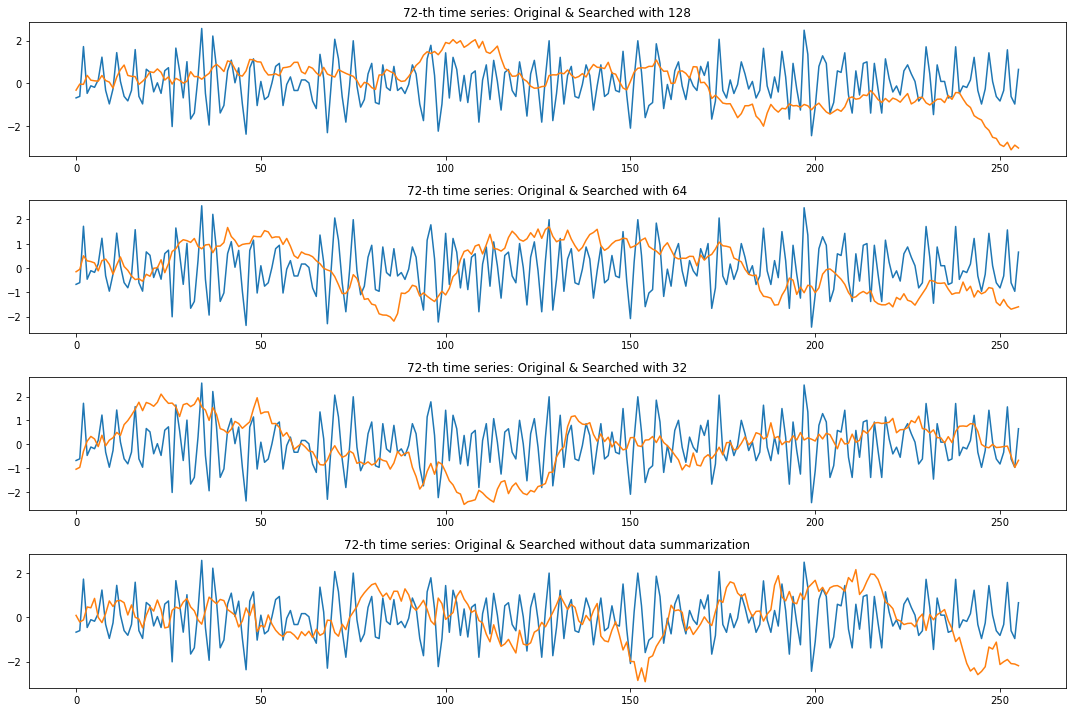

In [26]:
import random
i = random.randrange(0,99)
t = range(256)
x = time_series_synthetic_query[i,]

plt.subplot(4,1,1)
plt.plot(t, x, t, time_series_seismic[indexSimilarity_128_seismic[i],])
plt.title(str(i)+'-th time series: Original & Searched with 128')

plt.subplot(4,1,2)
plt.plot(t, x, t, time_series_seismic[indexSimilarity_64_seismic[i],])
plt.title(str(i)+'-th time series: Original & Searched with 64')

plt.subplot(4,1,3)
plt.plot(t, x, t, time_series_seismic[indexSimilarity_32_seismic[i],])
plt.title(str(i)+'-th time series: Original & Searched with 32')

plt.subplot(4,1,4)
plt.plot(t, x, t, time_series_seismic[indexSimilarity_seismic[i],])
plt.title(str(i)+'-th time series: Original & Searched without data summarization')

plt.tight_layout()
plt.show

## Visualize found closest signals WITH and WITHOUT data summarization - Synthetic

In [27]:
plt.rcParams['figure.figsize'] = [15, 10]

<function matplotlib.pyplot.show(*args, **kw)>

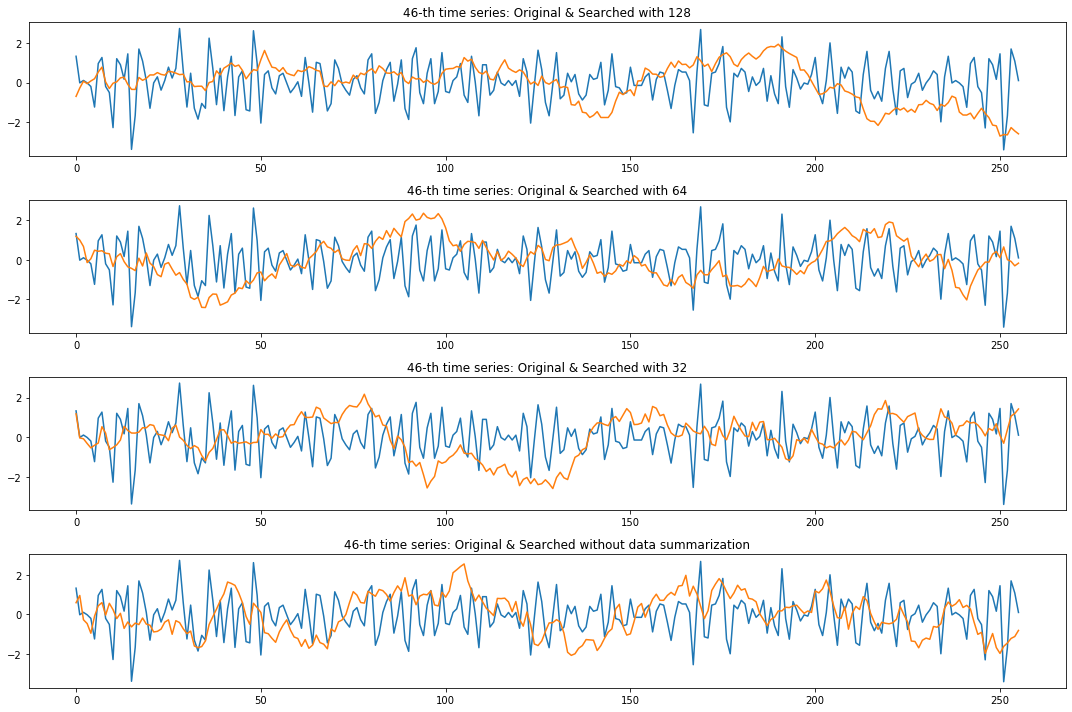

In [28]:
import random
i = random.randrange(0,99)
t = range(256)
x = time_series_synthetic_query[i,]

plt.subplot(4,1,1)
plt.plot(t, x, t, time_series_synthetic[indexSimilarity_128_synthetic[i],])
plt.title(str(i)+'-th time series: Original & Searched with 128')

plt.subplot(4,1,2)
plt.plot(t, x, t, time_series_synthetic[indexSimilarity_64_synthetic[i],])
plt.title(str(i)+'-th time series: Original & Searched with 64')

plt.subplot(4,1,3)
plt.plot(t, x, t, time_series_synthetic[indexSimilarity_32_synthetic[i],])
plt.title(str(i)+'-th time series: Original & Searched with 32')

plt.subplot(4,1,4)
plt.plot(t, x, t, time_series_synthetic[indexSimilarity_synthetic[i],])
plt.title(str(i)+'-th time series: Original & Searched without data summarization')

plt.tight_layout()
plt.show